<a href="https://colab.research.google.com/github/matheus-bokus/Projeto_regressao/blob/master/Projeto_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear da Temperatura Média Anual da Superfície Terrestre

### Bibliotecas

In [0]:
import numpy as np
from numpy.polynomial import Polynomial as P
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score as r2
import seaborn as sns

### Funcão da Regressão

In [0]:
def reg_linear(x,y):
  a=(sum(x*y)-(1/len(x))*sum(x)*sum(y))/(sum(x**2)-(1/len(x))*sum(x)**2)
  b=np.mean(y)-np.mean(x)*a
  return P([b,a])

### Calculo das médias anuais

Como o dataset tem os valores mensais das temperaturas, foi  necessário criar uma função que retornasse as médias anuais, para melhorar a visualização dos dados

In [0]:
def media_pd(datafram,string):
  c=0
  ano=0
  data=np.zeros([int((datafram.shape[0])/12)]) #tamanho do dataset/12(o dataset foi dado em meses)
  anos=np.zeros([int((datafram.shape[0])/12)]) #tamanho do dataset/12(o dataset foi dado em meses)
  print(datafram.shape[0]+1)
  for i in range(1,datafram.shape[0]+1): #até o final do dataset
    if i%12==0: #Para fazer por ano
      if np.isnan((sum(datafram[string][c:i])/12)): #testa se são nan
        data[ano]=data[ano-1] #se for nan, recebe 0(nan vai causar erros nos métodos mais adiante)
      else:
        data[ano]=(sum(datafram[string][c:i])/12) #recebe os valores dos 12 meses, e calcula a média
      anos[ano]=1850+ano #vai calculandos os anos referentes a cada temperetura média
      c=i #recebe o valor de i, quando i=12*n, ou seja, o valor referentes ao final do ano anterior
      ano+=1 #acrescendo os anos
  return data,anos

## Dados

A elevação da temperatura da superfície do planeta Terra é uma preocupação constante, pois afeta diretamente a vida de todos os seres vivos no mesmo, bem como da própria configuração geográfica do planeta, uma vez que a elevação da mesma causa deglaciação, e aumento dos niveis marítmos. Assim, seu monitoramento é crucial para a manutenção da vida, e uma estimativa precisa desse aumento é necessária, de forma a impedir maiores infórtúnios ambientais. 

O dataset escolhido, Climate Change: Earth Surface Temperature Data( Mudanças Climáticas: Dados da Temperatura na Superfície Terrestre), concatenou dados obtidos desde o ano de 1750, até 2015. Os dados iniciais foram coletados por técnicos usando termômetros de mercúrio, que estaja sujeito a vários erros, que poderiam afetar as medições. Na década de 1980, houve uma mudança para termômetros eletrônicos que, segundo se diz, têm um viés de resfriamento.

Dada a complexidade dos estudos sobre a temperatura, seus efeitos, e as causas da sua elevação, existem várias organizações que coletam dados de tendências climáticas. Os três conjuntos de dados de temperatura de terra e oceano mais citados são o MLOST da NOAA, o GISTEMP da NASA e o HadCrut do Reino Unido.
Os dados foram reempacotados de uma compilação mais recente reunida pelo Berkeley Earth, afiliada ao Laboratório Nacional Lawrence Berkeley. O Estudo de Temperatura da Superfície Terrestre de Berkeley combina 1,6 bilhão de relatórios de temperatura de 16 arquivos pré-existentes.

Neste conjunto de dados, foram incluídos vários arquivos:

* **Data** : começa em 1750 para temperatura média da terra e 1850 para temperaturas máxima e mínima da terra e temperaturas globais do oceano e da terra
* **LandAverageTemperatureUncertainty** : temperatura média global da terra em graus Celsius
* **Incerteza LandAverageTemperature **: o intervalo de confiança de 95% em torno da média
* **LandMaxTemperature** : temperatura máxima média global da terra em graus Celsius
* **LandMaxTemperatureUncertainty** : o intervalo de confiança de 95% em torno da temperatura máxima da terra
* **LandMinTemperature** : temperatura mínima média global da terra em graus Celsius
* **LandMinTemperatureUncertainty** : o intervalo de confiança de 95% em torno da temperatura mínima do solo
* **LandAndOceanAverageTemperature** : temperatura média global da terra e do oceano em graus Celsius
* **LandAndOceanAverageTemperatureUncertainty**: o intervalo de confiança de 95% em torno da temperatura média global da terra e do oceano


* Obs: Para os estudos a seguir, foram utilizados apenas os dados coletados a partir do ano de 1850, que contém os dados relativos as temperaturas médias dos oceanos e em terra.

In [0]:
dados = pd.read_csv("GlobalTemperatures.csv",sep=",")
dados.head()

Porém, dado o tamanho do dataset, seria muito custoso, em termos de processamento de análise de dados, o analisar da forma que foi montado.
Por isso, foi calculada as médias anuais das temperaturas, através da função media_pd(), de forma a melhorar  a análise dos dados

In [0]:
datal,anosl=media_pd(dados[1200:],"LandAverageTemperature")

1993


In [0]:
pd.DataFrame({"Ano":anosl,"Temperatura Média em Terra":datal})

,Ano,Temperatura Média em Terra
0,1850.0,7.900667
1,1851.0,8.178583
2,1852.0,8.100167
3,1853.0,8.041833
4,1854.0,8.210500
...,...,...
161,2011.0,9.516000
162,2012.0,9.507333
163,2013.0,9.606500
164,2014.0,9.570667


In [0]:
datalo,anoslo=media_pd(dados[1200:],"LandAndOceanAverageTemperature")

1993


In [0]:
pd.DataFrame({"Anos":anoslo,"Temperatura Média da Superfície do Planeta":datalo})

,Anos,Temperatura Média da Superfície do Planeta
0,1850.0,14.867167
1,1851.0,14.991833
2,1852.0,15.006500
3,1853.0,14.955167
4,1854.0,14.991000
...,...,...
161,2011.0,15.769500
162,2012.0,15.802333
163,2013.0,15.854417
164,2014.0,15.913000


## Objetivo do Projeto

O objetivo do projeto é estipular duas retas que descrevam, de forma satisfatória, a variação da média das temperaturas anuais em terra, e na superfície do planeta como um todo (em terra e nos oceanos).

## Análise dos dados

Abaixo, está uma breve descrição dos dados do Dataset

In [0]:
dados.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### Estimativa das correlações entre os dados

In [0]:
dados.corr().round(4)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
LandAverageTemperature,1.0000,-0.2042,0.9958,-0.1085,0.9956,-0.1675,0.9881,-0.1314
LandAverageTemperatureUncertainty,-0.2042,1.0000,-0.1329,0.8669,-0.1651,0.8887,-0.2080,0.9724
LandMaxTemperature,0.9958,-0.1329,1.0000,-0.1053,0.9934,-0.1600,0.9839,-0.1206
LandMaxTemperatureUncertainty,-0.1085,0.8669,-0.1053,1.0000,-0.1233,0.8687,-0.1634,0.8604
LandMinTemperature,0.9956,-0.1651,0.9934,-0.1233,1.0000,-0.1855,0.9864,-0.1549
LandMinTemperatureUncertainty,-0.1675,0.8887,-0.1600,0.8687,-0.1855,1.0000,-0.2217,0.8801
LandAndOceanAverageTemperature,0.9881,-0.2080,0.9839,-0.1634,0.9864,-0.2217,1.0000,-0.2031
LandAndOceanAverageTemperatureUncertainty,-0.1314,0.9724,-0.1206,0.8604,-0.1549,0.8801,-0.2031,1.0000


## Visualização Gráfica dos dados

### Temperatura Média Anual em Terra X Anos

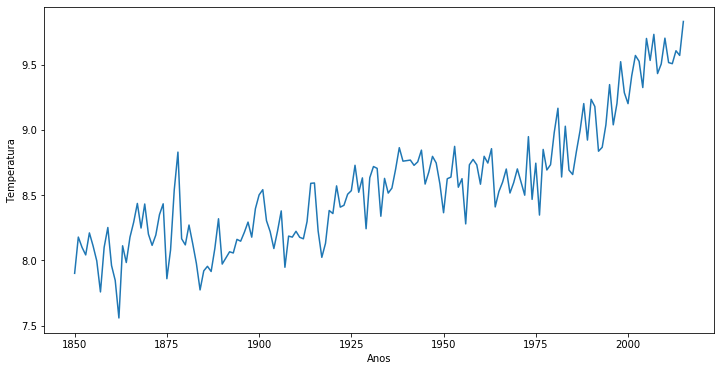

In [0]:
plt.figure(figsize=(12,6))
plt.plot(anosl,datal,'-')
plt.xlabel('Anos')
plt.ylabel('Temperatura')
plt.show()

### Distribuição da Frequência das Médias Anuais das Temperaturas em Terra

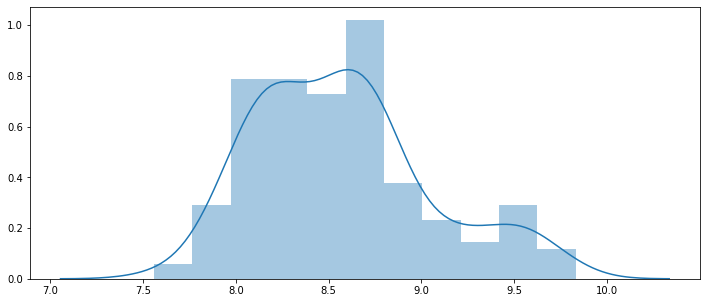

In [0]:
ax = sns.distplot(datal)
ax.figure.set_size_inches(12,5)

### Temperatura Média Anual na Superfície Terrestre

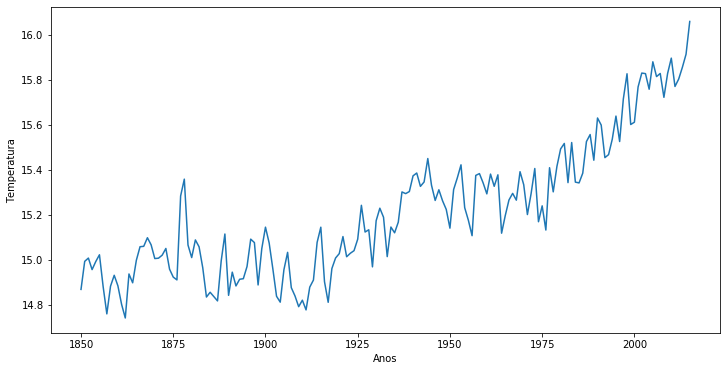

In [0]:
plt.figure(figsize=(12,6))
plt.plot(anoslo,datalo,'-')
plt.xlabel('Anos')
plt.ylabel('Temperatura')
plt.show()

### Distribuição da Frequência das Médias Anuais Temperaturas na Superfície

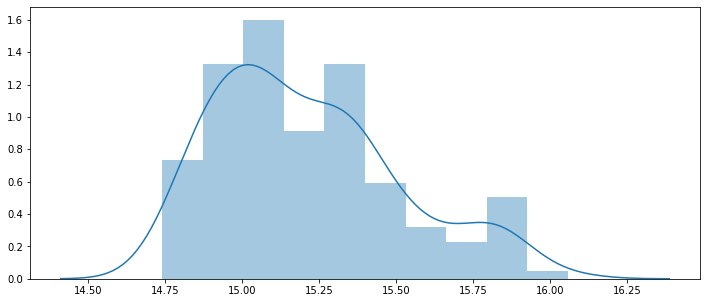

In [0]:
ax = sns.distplot(datalo)
ax.figure.set_size_inches(12,5)

## Regressão Linear

Através da função reg_linear(), foi construida a reta da regressão linear para as temperaturas médias anuais em terra, e na superfície do planeta.

### Temperatura Média Anual em Terra X Anos

In [0]:
poltemp=reg_linear(anosl,datal)
resp=[poltemp(valor) for valor in anosl]

In [0]:
print("Polinômio da Regressão: {}+{}x".format(list(poltemp)[0],list(poltemp)[1]))

Polinômio da Regressão: -7.915644176042104+0.00853155343201418x


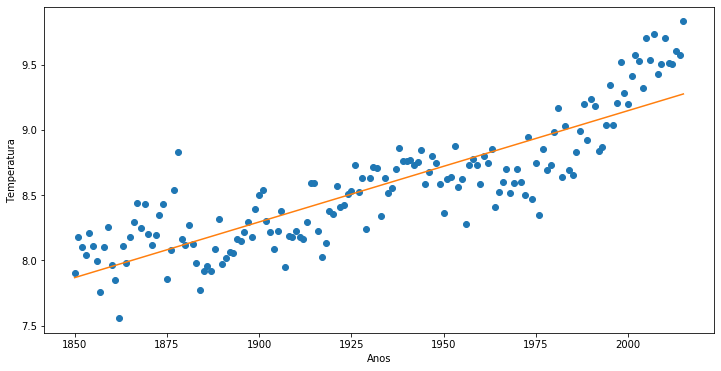

In [0]:
plt.figure(figsize=(12,6))
plt.plot(anosl,datal,'o',anosl,resp,'-')
plt.xlabel('Anos')
plt.ylabel('Temperatura')
plt.show()


### Temperatura Média na Superfície Terreste X Anos

In [0]:
poltemplo=reg_linear(anoslo,datalo)
resplo=[poltemplo(valorlo) for valorlo in anoslo]

In [0]:
print("Polinômio da Regressão: {}+{}x".format(list(poltemplo)[0],list(poltemplo)[1]))

Polinômio da Regressão: 4.873551343111936+0.0053500721448591325x


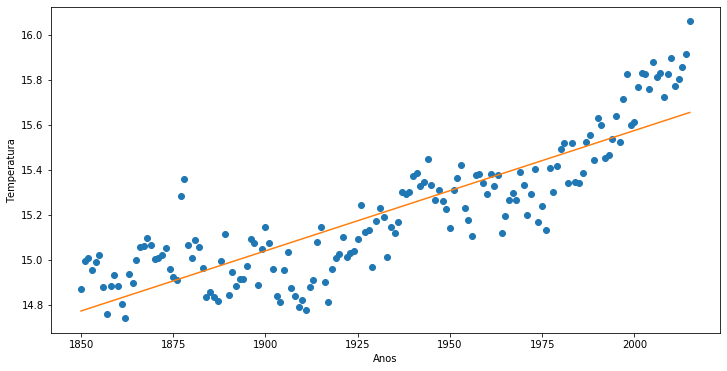

In [0]:
plt.figure(figsize=(12,6))
plt.plot(anoslo,datalo,'o',anoslo,resplo,'-')
plt.xlabel('Anos')
plt.ylabel('Temperatura')
plt.show()

## Análise dos Coeficientes de Determinação $R^2$

Através do Método do Coeficiente $R^2$, foi análisado o quanto as retas obtidas através da regressão linear se adequam aos dados. O resultado obtido foi muito satisfatório, uma vez que o coeficiente apresentou um valor aceitável para o grau deste polinômio, tendo em vista a distribuição dos dados no decorrer dos anos.

Embora esta não seja a maneira mais adequada de verificação da eficácia da regressão, uma vez que testa valores que já foram utilizadas na criação da mesma, indica que a reta consegue descrever de maneira bem aceitável os dados obtidos.

### Temperatura Média Anual em Terra X Anos

In [0]:
r2(resp,datal)

0.6656084160242473

### Temperatura Média Anual na Superfície X Anos

In [0]:
r2(resplo,datalo)

0.6513433426829771

## Referências

Berkeley Earth. Climate Change: Earth Surface Temperature Data. Disponível em: kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalTemperatures.csv. Acesso: 18/12/2019